In [1]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import Transformation
import DataCleaning
import ErrorVis
from sklearn import preprocessing as prep
import statsmodels.tools as stools
import statsmodels.api as sm

In [2]:
allEthereumData = DataCleaning.getEthereumData()
allBitcoinData = DataCleaning.getBitcoinData()
allDogeData = DataCleaning.getDogeData()
allShibaData = DataCleaning.getShibaData()

/Users/shivasaravanan/CryptoDataFull/DataCleaning.py:252: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets = pd.read_csv("eth_twitter_full.csv")
/Users/shivasaravanan/CryptoDataFull/DataCleaning.py:271: DtypeWarning: Columns (83,86,87,91,92) have mixed types. Specify dtype option on import or set low_memory=False.
  posts1 = pd.read_csv("ethereum-reddit.csv")
/Users/shivasaravanan/CryptoDataFull/DataCleaning.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modTrends["DayTime"] = pd.to_datetime(modTrends["Day"])
/Users/shivasaravanan/CryptoDataFull/DataCleaning.py:17: DtypeWarning: Columns (83,84) have mixed types. Specify dtype option on import or set low_memory=False.
  a

Index(['allPosts'], dtype='object')


/Users/shivasaravanan/CryptoDataFull/DataCleaning.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allModTrends["DayTime"] = pd.to_datetime(allModTrends["Day"])
/Users/shivasaravanan/CryptoDataFull/DataCleaning.py:209: DtypeWarning: Columns (83,87,88,91) have mixed types. Specify dtype option on import or set low_memory=False.
  bitcoinPosts = pd.read_csv("bitcoin_posts.csv")[["normal_date", "one"]]
/Users/shivasaravanan/CryptoDataFull/DataCleaning.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b

Index(['allPosts'], dtype='object')


/Users/shivasaravanan/CryptoDataFull/DataCleaning.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allModTrends["DayTime"] = pd.to_datetime(allModTrends["Day"])
/Users/shivasaravanan/CryptoDataFull/DataCleaning.py:129: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  transactions = pd.read_csv("doge_transactions.csv")[["timestamp_day", "transaction_count"]]
/Users/shivasaravanan/CryptoDataFull/DataCleaning.py:141: DtypeWarning: Columns (88) have mixed types. Specify dtype option on import or set low_memory=False.
  posts1 = pd.read_csv("dogecoin_posts.csv")
/Users/shivasaravanan/CryptoDataFull/DataCleaning.py:162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

Index(['allPosts'], dtype='object')


/Users/shivasaravanan/CryptoDataFull/DataCleaning.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allModTrends["DayTime"] = pd.to_datetime(allModTrends["Day"])
/Users/shivasaravanan/CryptoDataFull/DataCleaning.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modTrends["DayTime"] = pd.to_datetime(modTrends["Day"])
/Users/shivasaravanan/CryptoDataFull/DataCleaning.py:17: DtypeWarning: Columns (83,84) have mixed types. Specify dtype option on import or set low_memory=False.
  allPosts1 = pd.read_csv("

Index(['allPosts'], dtype='object')


/Users/shivasaravanan/CryptoDataFull/DataCleaning.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allModTrends["DayTime"] = pd.to_datetime(allModTrends["Day"])


In [3]:
#add column for smoothed price

allBitcoinData["smoothedClosingPrice"] = allBitcoinData["Close"].sort_index(ascending=False).ewm(span=2).mean().sort_index(ascending=True)
allEthereumData["smoothedClosingPrice"] = allEthereumData["Close"].sort_index(ascending=False).ewm(span=2).mean().sort_index(ascending=True)
allDogeData["smoothedClosingPrice"] = allDogeData["Close"].sort_index(ascending=False).ewm(span=2).mean().sort_index(ascending=True)
allShibaData["smoothedClosingPrice"] = allShibaData["Close"].sort_index(ascending=False).ewm(span=2).mean().sort_index(ascending=True)
allBitcoinData["standardized_smoothPrice"] = prep.StandardScaler().fit_transform(allBitcoinData[["smoothedClosingPrice"]])
allEthereumData["standardized_smoothPrice"] = prep.StandardScaler().fit_transform(allEthereumData[["smoothedClosingPrice"]])
allDogeData["standardized_smoothPrice"] = prep.StandardScaler().fit_transform(allDogeData[["smoothedClosingPrice"]])
allShibaData["standardized_smoothPrice"] = prep.StandardScaler().fit_transform(allShibaData[["smoothedClosingPrice"]])

In [4]:
# analysis methods

def constructRemovedModel(fullList, toRemove, yVals, dataList):
    idx = pd.date_range('2020-08-02', '2022-02-28')
    noRemove = fullList[:]
    for item in toRemove:
        noRemove.remove(item)
    xVals = sm.add_constant(Transformation.repeated_gs_removal(noRemove, toRemove, dataList))
    xVals.index = idx
    modelQuadSmoothed = sm.OLS(yVals, xVals).fit()
    print(modelQuadSmoothed.summary())
    

def cryptoAnalyze(allData):
    # change trends, add smooth price to data cleaning
    allList = ["standardized_txs", "standardized_posts", "standardized_tweets", "standardized_trends", "standardized_txSq",
    "standardized_trendSq", "standardized_postsSq", "standardized_tweetsSq", "standardized_allTweets", "standardized_allPosts",
    "standardized_allTrends", "standardized_allTweetsSq", "standardized_allPostsSq", "standardized_allTrendsSq"]
    #  normal
    print("INITIAL QUADRATIC:")
    XQuadSmooth = sm.add_constant(allData[allList])
    YSmooth = allData["standardized_smoothPrice"]
    modelQuadSmoothed = sm.OLS(YSmooth, XQuadSmooth).fit(cov_type='HC3')
    print(modelQuadSmoothed.summary())
    
    
    
    #  train/test
    print("\n\n\nTRAIN/TEST QUADRATIC + MSE")
    XQuadSmoothSplit = sm.add_constant(allData[0:456][allList])
    YSmoothSplit = allData[0:456]["standardized_smoothPrice"]
    modelQuadSmoothedSplit = sm.OLS(YSmoothSplit, XQuadSmoothSplit).fit(cov_type='HC3')
    print(modelQuadSmoothedSplit.summary())
    YPredictTrain = modelQuadSmoothedSplit.predict(XQuadSmoothSplit)
    print("Train MSE: " + str(stools.eval_measures.mse(YSmoothSplit, YPredictTrain)))
    YNewTest = allData[456:]["standardized_smoothPrice"]
    XnewTest = sm.add_constant(allData[548:][allList])
    YNewPredict = modelQuadSmoothedSplit.predict(XnewTest)
    YNewTest = allData[456:]["standardized_smoothPrice"]
    testr2 = YNewTest.corr(YNewPredict)**2
    plt.plot()
    testr2adj = 1 - ((1 - testr2)*(575)/(575 - len(allList) - 1))
    print("Test R^2: " + str(testr2))
    
    
    # no tx
    print("\n\n\nNo transactions")
    constructRemovedModel(allList, ["standardized_txs", "standardized_txSq"], YSmooth, allData)
    
    
    print("\n\n\nNo trends")
    constructRemovedModel(allList, ["standardized_trends", "standardized_trendSq"], YSmooth, allData)
    
    print("\n\n\nNo posts")
    constructRemovedModel(allList, ["standardized_posts", "standardized_postsSq"], YSmooth, allData)
    
    print("\n\n\nNo tweets")
    constructRemovedModel(allList, ["standardized_tweets", "standardized_tweetsSq"], YSmooth, allData)
    
    print("\n\n\nNo general trends")
    constructRemovedModel(allList, ["standardized_allTrends", "standardized_allTrendsSq"], YSmooth, allData)
    
    print("\n\n\nNo general posts")
    constructRemovedModel(allList, ["standardized_allPosts", "standardized_allPostsSq"], YSmooth, allData)
    
    print("\n\n\nNo general tweets")
    constructRemovedModel(allList, ["standardized_allTweets", "standardized_allTweetsSq"], YSmooth, allData)
    
    
    
    
    
    
    
    

Bitcoin
INITIAL QUADRATIC:
                               OLS Regression Results                               
Dep. Variable:     standardized_smoothPrice   R-squared:                       0.813
Model:                                  OLS   Adj. R-squared:                  0.808
Method:                       Least Squares   F-statistic:                     240.6
Date:                      Wed, 01 Jun 2022   Prob (F-statistic):          2.08e-226
Time:                              19:28:12   Log-Likelihood:                -335.07
No. Observations:                       576   AIC:                             700.1
Df Residuals:                           561   BIC:                             765.5
Df Model:                                14                                         
Covariance Type:                        HC3                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------

                               OLS Regression Results                               
Dep. Variable:     standardized_smoothPrice   R-squared:                       0.046
Model:                                  OLS   Adj. R-squared:                  0.026
Method:                       Least Squares   F-statistic:                     2.272
Date:                      Wed, 01 Jun 2022   Prob (F-statistic):            0.00810
Time:                              19:28:13   Log-Likelihood:                -803.69
No. Observations:                       576   AIC:                             1633.
Df Residuals:                           563   BIC:                             1690.
Df Model:                                12                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

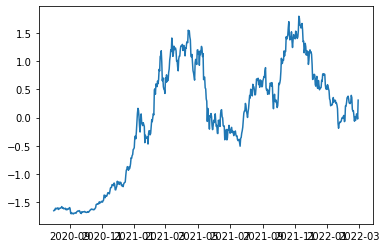

In [5]:
print("Bitcoin")
plt.plot(pd.date_range('2020-08-02', '2022-02-28'), allBitcoinData["standardized_price"])
cryptoAnalyze(allBitcoinData)

Ethereum
INITIAL QUADRATIC:
                               OLS Regression Results                               
Dep. Variable:     standardized_smoothPrice   R-squared:                       0.902
Model:                                  OLS   Adj. R-squared:                  0.900
Method:                       Least Squares   F-statistic:                     513.1
Date:                      Wed, 01 Jun 2022   Prob (F-statistic):          7.61e-309
Time:                              19:28:13   Log-Likelihood:                -147.01
No. Observations:                       576   AIC:                             324.0
Df Residuals:                           561   BIC:                             389.4
Df Model:                                14                                         
Covariance Type:                        HC3                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------

                               OLS Regression Results                               
Dep. Variable:     standardized_smoothPrice   R-squared:                       0.156
Model:                                  OLS   Adj. R-squared:                  0.138
Method:                       Least Squares   F-statistic:                     8.675
Date:                      Wed, 01 Jun 2022   Prob (F-statistic):           2.88e-15
Time:                              19:28:13   Log-Likelihood:                -768.45
No. Observations:                       576   AIC:                             1563.
Df Residuals:                           563   BIC:                             1620.
Df Model:                                12                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

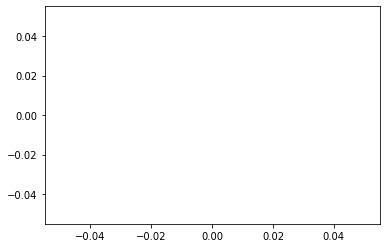

In [6]:
print("Ethereum")
cryptoAnalyze(allEthereumData)

Shiba
INITIAL QUADRATIC:
                               OLS Regression Results                               
Dep. Variable:     standardized_smoothPrice   R-squared:                       0.874
Model:                                  OLS   Adj. R-squared:                  0.871
Method:                       Least Squares   F-statistic:                     187.1
Date:                      Wed, 01 Jun 2022   Prob (F-statistic):          9.34e-201
Time:                              19:28:13   Log-Likelihood:                -220.35
No. Observations:                       576   AIC:                             470.7
Df Residuals:                           561   BIC:                             536.0
Df Model:                                14                                         
Covariance Type:                        HC3                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------

                               OLS Regression Results                               
Dep. Variable:     standardized_smoothPrice   R-squared:                       0.472
Model:                                  OLS   Adj. R-squared:                  0.461
Method:                       Least Squares   F-statistic:                     42.00
Date:                      Wed, 01 Jun 2022   Prob (F-statistic):           2.60e-70
Time:                              19:28:14   Log-Likelihood:                -633.19
No. Observations:                       576   AIC:                             1292.
Df Residuals:                           563   BIC:                             1349.
Df Model:                                12                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

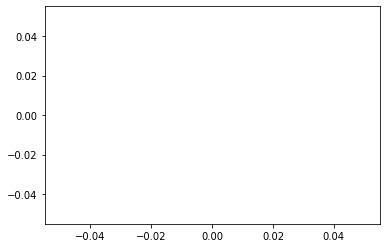

In [7]:
print("Shiba")
cryptoAnalyze(allShibaData)

Doge
INITIAL QUADRATIC:
                               OLS Regression Results                               
Dep. Variable:     standardized_smoothPrice   R-squared:                       0.804
Model:                                  OLS   Adj. R-squared:                  0.799
Method:                       Least Squares   F-statistic:                     267.6
Date:                      Wed, 01 Jun 2022   Prob (F-statistic):          1.57e-237
Time:                              19:28:14   Log-Likelihood:                -348.28
No. Observations:                       576   AIC:                             726.6
Df Residuals:                           561   BIC:                             791.9
Df Model:                                14                                         
Covariance Type:                        HC3                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------

                               OLS Regression Results                               
Dep. Variable:     standardized_smoothPrice   R-squared:                       0.242
Model:                                  OLS   Adj. R-squared:                  0.225
Method:                       Least Squares   F-statistic:                     14.95
Date:                      Wed, 01 Jun 2022   Prob (F-statistic):           2.06e-27
Time:                              19:28:14   Log-Likelihood:                -737.64
No. Observations:                       576   AIC:                             1501.
Df Residuals:                           563   BIC:                             1558.
Df Model:                                12                                         
Covariance Type:                  nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

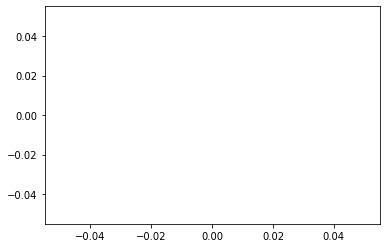

In [8]:
print("Doge")
cryptoAnalyze(allDogeData)

In [9]:
print(allEthereumData["standardized_allTrends"].corr(allEthereumData["standardized_allPosts"]))
print(allEthereumData["standardized_allPosts"].corr(allEthereumData["standardized_allTweets"]))
print(allEthereumData["standardized_allTrends"].corr(allEthereumData["standardized_allTweets"]))

0.817884898701588
0.5118045467806348
0.5606535454913568


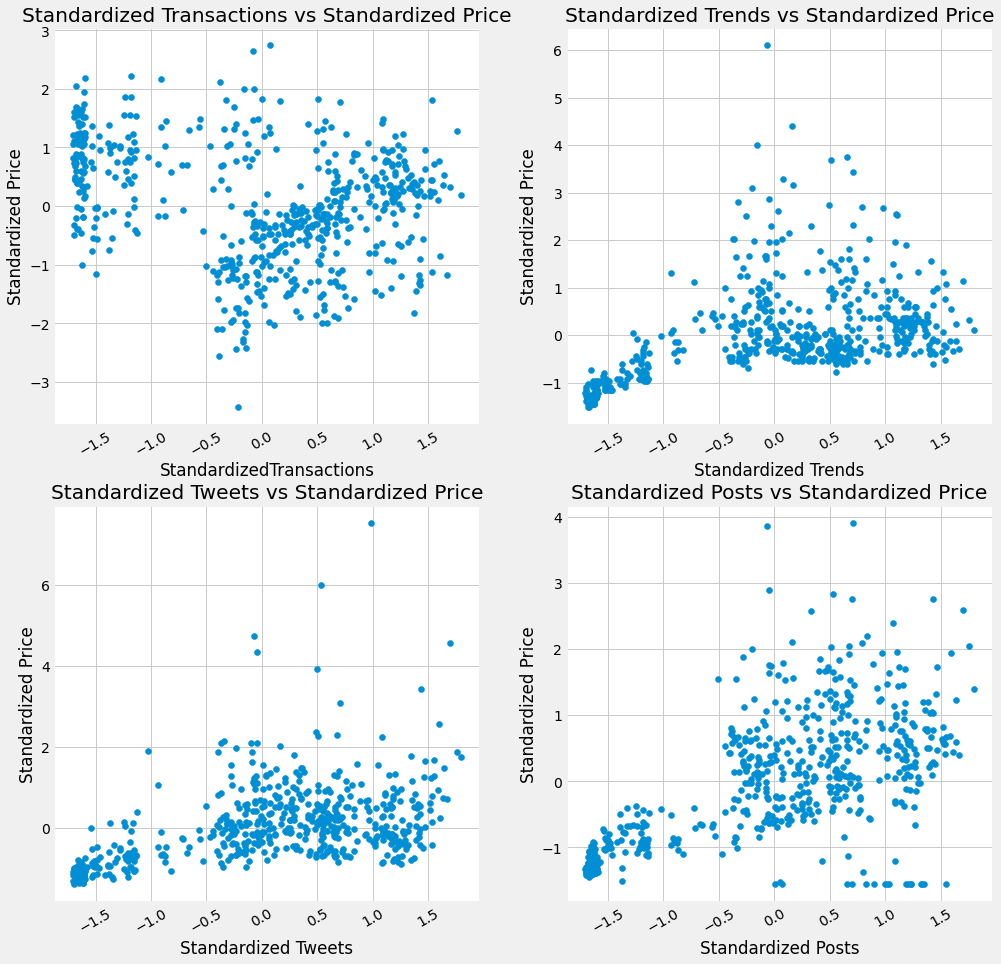

In [22]:
plt.style.use('fivethirtyeight')
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
for ax in axs.flat:
    ax.tick_params('x', labelrotation=30)
    ax.set_ylabel("Standardized Price")
    ax.set_facecolor('white')
    
axs[0, 0].set_title("Standardized Transactions vs Standardized Price")
axs[0, 1].set_title("Standardized Trends vs Standardized Price")
axs[1, 0].set_title("Standardized Tweets vs Standardized Price")
axs[1, 1].set_title("Standardized Posts vs Standardized Price")
axs[0, 0].set_xlabel("StandardizedTransactions")
axs[0, 1].set_xlabel("Standardized Trends")
axs[1, 0].set_xlabel("Standardized Tweets")
axs[1, 1].set_xlabel("Standardized Posts")
axs[0, 0].scatter(allBitcoinData["standardized_price"], allBitcoinData["standardized_txs"])
axs[0, 1].scatter(allBitcoinData["standardized_price"], allBitcoinData["standardized_trends"])
axs[1, 0].scatter(allBitcoinData["standardized_price"], allBitcoinData["standardized_tweets"])
axs[1, 1].scatter(allBitcoinData["standardized_price"], allBitcoinData["standardized_posts"])

plt.savefig('crypto_scatterplots.eps', format='eps', dpi=1000)

In [11]:
allBitcoinData.describe()

,tweet_count,Close,Volume,one,Bitcoin,transaction_count,allTweet_count,allPosts,Cryptocurrency,standardized_allTweets,...,standardized_txs,standardized_tweets,standardized_posts,standardized_social,standardized_txSq,standardized_tweetsSq,standardized_postsSq,standardized_trendSq,smoothedClosingPrice,standardized_smoothPrice
count,576.000000,576.000000,5.760000e+02,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,...,5.760000e+02,5.760000e+02,576.000000,5.760000e+02,576.000000,5.760000e+02,576.000000,576.000000,576.000000,5.760000e+02
mean,306.803819,38105.944070,4.153071e+10,224.654514,24.637847,277240.157986,158.519097,1324.184028,23.069375,-4.934325e-17,...,-2.960595e-16,-7.401487e-17,0.000000,2.467162e-17,1.000000,1.000000e+00,1.000000,1.000000,38132.579230,2.960595e-16
std,205.295100,16415.053077,2.217029e+10,144.758223,12.369359,45442.961486,125.193442,886.690008,15.176430,1.000869e+00,...,1.000869e+00,1.000869e+00,1.000869,8.445609e-01,1.291792,3.330223e+00,1.423859,2.441723,16367.270707,1.000869e+00
min,21.000000,10131.516602,1.373656e+10,0.000000,5.920000,121538.000000,7.000000,0.000000,3.240000,-1.211332e+00,...,-3.429299e+00,-1.393371e+00,-1.553278,-1.389474e+00,0.000006,9.147647e-07,0.000087,0.000124,10183.871571,-1.709082e+00
25%,164.750000,23848.131348,2.738660e+10,98.000000,18.000000,247527.250000,66.000000,432.000000,8.640000,-7.396515e-01,...,-6.544189e-01,-6.925508e-01,-0.875699,-5.260459e-01,0.105983,7.506043e-02,0.153440,0.074011,24116.028131,-8.571212e-01
50%,283.000000,40472.140625,3.662568e+10,226.500000,22.740000,276946.000000,133.500000,1386.000000,23.000000,-2.000172e-01,...,-6.478752e-03,-1.160501e-01,0.012760,2.365831e-02,0.515630,3.607381e-01,0.507163,0.237106,40300.703854,1.325822e-01
75%,410.000000,49964.812500,4.970076e+10,316.250000,29.000000,311336.500000,215.250000,1928.250000,30.970000,4.535398e-01,...,7.509629e-01,5.031093e-01,0.633298,4.393254e-01,1.441609,1.056220e+00,1.487913,1.199940,50006.495120,7.260976e-01
max,1851.000000,67566.828125,3.509679e+11,790.000000,100.000000,401744.000000,1459.000000,4418.000000,100.000000,1.039680e+01,...,2.742164e+00,7.528374e+00,3.908841,4.897744e+00,11.760090,5.667642e+01,15.279038,37.184921,67138.622478,1.773738e+00


In [12]:
allDogeData.describe()

,tweet_count,Close,Volume,one,transaction_count,Dogecoin,allTweet_count,allPosts,Cryptocurrency,standardized_allTweets,...,standardized_tweets,standardized_posts,standardized_social,standardized_txSq,standardized_tweetsSq,standardized_postsSq,standardized_trendSq,standardized_price,smoothedClosingPrice,standardized_smoothPrice
count,576.000000,576.000000,5.760000e+02,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,...,5.760000e+02,5.760000e+02,5.760000e+02,576.000000,5.760000e+02,5.760000e+02,576.000000,576.000000,576.000000,576.000000
mean,124.913194,0.145847,2.745793e+09,48.920139,35706.218750,5.114705,158.519097,1324.184028,23.069375,-4.934325e-17,...,3.083953e-18,6.167906e-17,-1.541976e-17,1.000000,1.000000e+00,1.000000e+00,1.000000,0.000000,0.145958,0.000000
std,241.600668,0.133278,5.837572e+09,86.926919,13912.498582,10.547565,125.193442,886.690008,15.176430,1.000869e+00,...,1.000869e+00,1.000869e+00,9.783428e-01,3.217598,6.974015e+00,5.209828e+00,6.195097,1.000869,0.132603,1.000869
min,0.000000,0.002517,2.275453e+07,0.000000,16837.000000,0.000000,7.000000,0.000000,3.240000,-1.211332e+00,...,-5.174728e-01,-5.632623e-01,-5.382962e-01,0.000033,1.293163e-07,8.455061e-07,0.000002,-1.076357,0.002526,-1.082605
25%,9.750000,0.004538,1.612724e+08,2.000000,25398.750000,0.990000,66.000000,432.000000,8.640000,-7.396515e-01,...,-4.770818e-01,-5.402345e-01,-5.052692e-01,0.099942,2.213433e-02,3.360004e-02,0.040267,-1.061180,0.004565,-1.067211
50%,74.000000,0.148226,1.094840e+09,26.000000,33265.000000,2.600000,133.500000,1386.000000,23.000000,-2.000172e-01,...,-2.109160e-01,-2.639005e-01,-2.255589e-01,0.387033,9.123692e-02,1.710496e-01,0.087354,0.017859,0.149049,0.023328
75%,127.000000,0.242432,2.443195e+09,54.250000,41215.000000,4.000000,215.250000,1928.250000,30.970000,4.535398e-01,...,8.644924e-03,6.136757e-02,5.130226e-02,1.035279,2.467700e-01,3.172645e-01,0.235554,0.725315,0.242993,0.732408
max,2536.000000,0.684777,6.941068e+10,849.000000,141024.000000,100.000000,1459.000000,4418.000000,100.000000,1.039680e+01,...,9.988311e+00,9.212052e+00,9.600181e+00,57.404743,9.976635e+01,8.486190e+01,81.067737,4.047161,0.657116,3.858147


In [13]:
allShibaData.describe()

,Unnamed: 0,Tweet Id,tweet_count,Close,Volume,one,tx_count,Shiba,allTweet_count,allPosts,...,standardized_tweets,standardized_posts,standardized_social,standardized_txSq,standardized_tweetsSq,standardized_postsSq,standardized_trendSq,standardized_price,smoothedClosingPrice,standardized_smoothPrice
count,5.760000e+02,5.760000e+02,576.000000,576.000000,5.760000e+02,576.000000,576.000000,576.000000,576.000000,576.000000,...,5.760000e+02,5.760000e+02,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,5.760000e+02
mean,4.572695e+05,5.598673e+19,38.635417,0.000011,1.141213e+09,17.251736,2262.156250,5.314050,158.519097,1324.184028,...,2.467162e-17,7.401487e-17,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.129973e-05,4.934325e-17
std,1.219076e+06,1.370267e+20,94.181891,0.000016,3.089487e+09,37.080652,5601.275818,9.736056,125.193442,886.690008,...,1.000869e+00,1.000869e+00,0.949542,7.860554,9.459940,6.886203,6.015473,1.000869,1.582555e-05,1.000869e+00
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.358400,7.000000,0.000000,...,-4.105778e-01,-4.656534e-01,-0.438116,0.000002,0.000015,0.000046,0.000794,-0.710263,3.307990e-129,-7.146391e-01
25%,4.589150e+04,3.606712e+18,2.750000,0.000000,2.298000e+03,0.000000,10.000000,0.560000,66.000000,432.000000,...,-3.813536e-01,-4.656534e-01,-0.422175,0.080736,0.071627,0.043739,0.056589,-0.710263,1.399083e-60,-7.146391e-01
50%,1.460200e+05,1.288915e+19,9.000000,0.000006,2.318191e+08,6.000000,506.500000,2.800000,133.500000,1386.000000,...,-3.149350e-01,-3.037033e-01,-0.275367,0.130411,0.135475,0.216833,0.225531,-0.332389,6.001626e-06,-3.350730e-01
75%,4.139300e+05,7.694934e+19,53.000000,0.000021,9.949415e+08,18.000000,1887.250000,6.000000,215.250000,1928.250000,...,1.526522e-01,2.019690e-02,0.052180,0.163246,0.159961,0.216833,0.242233,0.612296,2.111753e-05,6.209157e-01
max,1.462155e+07,1.867911e+21,1284.000000,0.000080,3.905385e+10,412.000000,70327.000000,100.000000,1459.000000,4418.000000,...,1.323447e+01,1.065492e+01,10.065637,147.919839,175.151092,113.527314,94.745722,4.328056,7.644184e-05,4.119840e+00


In [14]:
allEthereumData.describe()

,tweet_count,Close,Volume,one,transaction_count,Ethereum,allTweet_count,allPosts,Cryptocurrency,standardized_allTweets,...,standardized_tweets,standardized_posts,standardized_social,standardized_txSq,standardized_tweetsSq,standardized_postsSq,standardized_trendSq,standardized_price,smoothedClosingPrice,standardized_smoothPrice
count,576.000000,576.000000,5.760000e+02,576.000000,5.760000e+02,576.000000,576.000000,576.000000,576.000000,5.760000e+02,...,5.760000e+02,576.000000,5.760000e+02,576.000000,576.000000,5.760000e+02,576.000000,5.760000e+02,576.000000,5.760000e+02
mean,239.888889,2183.645319,2.277448e+10,121.001736,1.220084e+06,24.093333,158.519097,1324.184028,23.069375,-4.934325e-17,...,4.934325e-17,0.000000,-4.934325e-17,1.000000,1.000000,1.000000e+00,1.000000,-2.960595e-16,2185.792490,2.960595e-16
std,166.191827,1326.612592,1.136664e+10,99.766641,1.141810e+05,14.755301,125.193442,886.690008,15.176430,1.000869e+00,...,1.000869e+00,1.000869,8.562292e-01,2.156833,1.314853,1.850780e+00,2.326747,1.000869e+00,1323.537512,1.000869e+00
min,15.000000,321.116302,8.125837e+09,0.000000,9.565280e+05,3.640000,7.000000,0.000000,3.240000,-1.211332e+00,...,-1.354365e+00,-1.213902,-1.240282e+00,0.000004,0.000029,3.033465e-10,0.000040,-1.405194e+00,330.985730,-1.402619e+00
25%,96.500000,641.724427,1.458641e+10,30.000000,1.147140e+06,14.560000,66.000000,432.000000,8.640000,-7.396515e-01,...,-8.635414e-01,-0.912939,-8.020612e-01,0.069875,0.148816,9.056829e-02,0.052681,-1.163310e+00,648.749743,-1.162323e+00
50%,196.000000,2218.869995,1.954102e+10,108.000000,1.207138e+06,22.560000,133.500000,1386.000000,23.000000,-2.000172e-01,...,-2.643153e-01,-0.130435,4.805709e-02,0.323671,0.659914,5.813145e-01,0.286186,2.657542e-02,2230.535741,3.383519e-02
75%,352.500000,3245.374634,2.746443e+10,173.000000,1.275740e+06,31.065000,215.250000,1928.250000,30.970000,4.535398e-01,...,6.781861e-01,0.521652,5.348941e-01,0.912359,1.226440,1.130863e+00,1.300667,8.010267e-01,3251.412580,8.058301e-01
max,812.000000,4812.087402,8.448291e+10,604.000000,1.716600e+06,100.000000,1459.000000,4418.000000,100.000000,1.039680e+01,...,3.445467e+00,4.845488,4.050333e+00,18.942315,11.871240,2.347876e+01,26.510527,1.983041e+00,4777.952632,1.960211e+00
